<a href="https://colab.research.google.com/github/Sanardi/AI-Machine-Learning/blob/master/Aufgabe_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Build a model which predicts sales based on the money spent on different platforms for marketing.

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.



**Import** **libraries** 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

**Datasets**

In [ ]:
advertising = pd.DataFrame(pd.read_csv(r"data\datasets_advertising.csv"))
advertising.head()

FileNotFoundError: ignored

In [ ]:
advertising.sample(frac = 1)

**Based on your knowledge of machine learning please perform the following tasks:**

> Data Inspection

> Data Cleaning

> Exploratory Data Analysis

> Performing Simple Linear Regression Model

> Model Evaluation

** Notice: Please document your code blocks and add a description to each task and explain your methodology and results accordingly in details. 


In [ ]:
#Importing my libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# Summary statistics to gain a first impression:

In [ ]:
advertising.describe()

# Visual Overview of the dimensions and spread of features (as well as the target variable Sales):

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x="variable", y="value", data=pd.melt(advertising))

plt.show()

# by far the largest amount of spending occurs in TV advetisements and this is also the feature with the highest relative variance. For accurate linear regression the explanatory variable may need to be scaled, but a log transformation will also help. I will investigate this further....

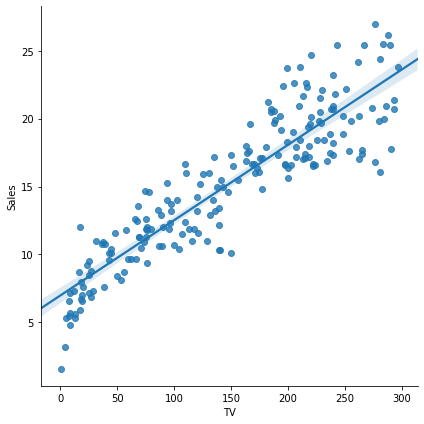

In [ ]:
plot = sns.lmplot(y="Sales", x="TV", height=6, palette="rainbow_r", data=advertising)
axes = plot.axes


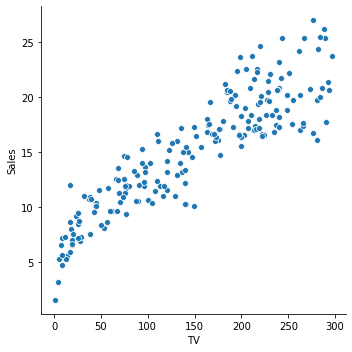

In [ ]:

sns.relplot(x="TV", y="Sales", palette="rainbow_r", data = advertising)

# this relationship does not look completely linear,  probably should take the log to straighten it

In [ ]:


advertising['log_tv'] = advertising['TV'].apply(np.log)
advertising['log_sales'] = advertising['Sales'].apply(np.log)

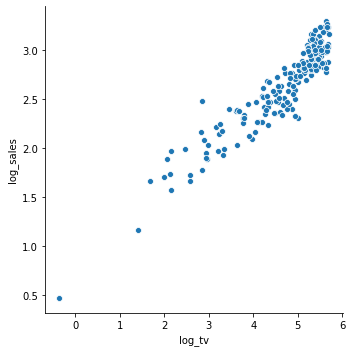

In [ ]:
import seaborn as sns

sns.relplot(x="log_tv", y="log_sales", palette="rainbow_r", data = advertising)

# better....

# I will try regression on both the original and log transformed data and compare the results

In [ ]:
X = advertising['TV']
y = advertising['Sales']

In [ ]:
X = np.asarray(X).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                    test_size = 0.3, random_state=0) 

# 10 fold Cross validation on unscaled - untransformed data is not very good:

# Tried few other regressors but will not investigate tuning those parameters as simple linear regression was requested

LR: 0.806124 (0.032621)
KNN: 0.801715 (0.031889)
XGB: 0.714438 (0.057179)
LassoR: 0.806133 (0.032375)


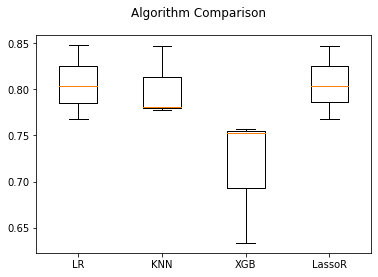

In [ ]:
#10-fold cross validation:

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB',xgb.XGBRegressor(verbosity=0))) 
models.append(('LassoR',Lasso()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold( n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn import preprocessing 
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X) 
  
#print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 

X = x_after_min_max_scaler
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(X) 
  
#print ("\nAfter Standardisation : \n", x_after_Standardisation) 

X = x_after_Standardisation


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                    test_size = 0.3, random_state=0) 

LR: 0.806124 (0.032621)
KNN: 0.801715 (0.031889)
XGB: 0.714438 (0.057179)
LassoR: 0.770638 (0.015585)


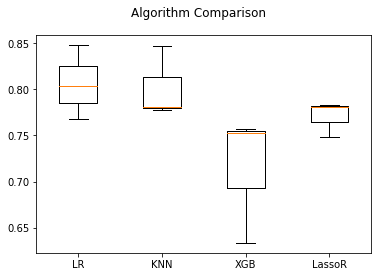

In [ ]:
#10-fold cross validation:

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB',xgb.XGBRegressor(verbosity=0))) 
models.append(('LassoR',Lasso()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold( n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# The plot shows that scaling and standardizing is not enough to imrpove the not-quite linear relationship, so I will use the log transformation

In [ ]:
X = advertising['log_tv']
y = advertising['log_sales']

X = np.asarray(X).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                    test_size = 0.3, random_state=0) 

LR: 0.856337 (0.040541)
KNN: 0.818649 (0.011925)
XGB: 0.756443 (0.041011)


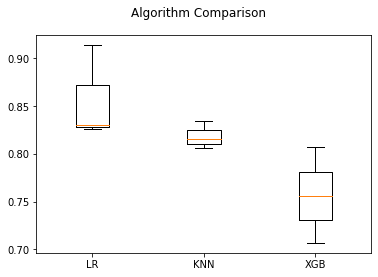

In [ ]:
#10-fold cross validation:

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB',xgb.XGBRegressor(verbosity=0))) 

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold( n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# As expected The Log transformation improved the accuracy of simple linear regression by nearly 5% from 0.806124 to 0.856337 using 10-fold cross validation. 
